In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Task - 1
#importing dataset
df=pd.read_csv("C:/Users/kasya/Downloads/archivE/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# descriptive stat
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [4]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [5]:
#checking null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


C:\Users\kasya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

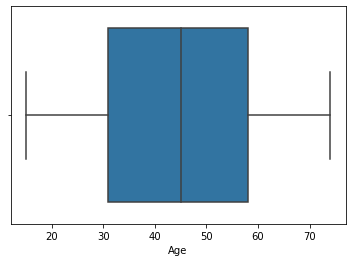

In [7]:
sns.boxplot(df.Age)

C:\Users\kasya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

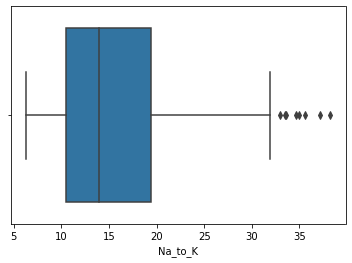

In [8]:
sns.boxplot(df.Na_to_K)

In [13]:
# Replacement of outliers using median
#Using IQR

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1

upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [12]:
df.median()

C:\Users\kasya\AppData\Local\Temp\ipykernel_19084\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [14]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,45,df['Na_to_K'])

C:\Users\kasya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

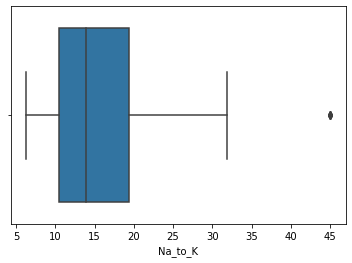

In [15]:
sns.boxplot(df.Na_to_K)

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [17]:
# Spliting the data
x = df.iloc[:,0:5]

In [18]:
y = pd.get_dummies(df.iloc[:,5:]).values

In [19]:
# Split the training and testing data
from sklearn.model_selection import train_test_split

In [31]:
# Splitting the data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=21)

In [32]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((140, 5), (60, 5), (140, 5), (60, 5))

In [33]:
#One hot Coding
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder() 

In [35]:
xtrain['Sex']= le.fit_transform(xtrain['Sex'])
xtrain['BP']= le.fit_transform(xtrain['BP'])
xtrain['Cholesterol']= le.fit_transform(xtrain['Cholesterol'])

In [36]:
xtest['Sex']= le.fit_transform(xtest['Sex'])
xtest['BP']= le.fit_transform(xtest['BP'])
xtest['Cholesterol']= le.fit_transform(xtest['Cholesterol'])

In [37]:
xtrain


,Age,Sex,BP,Cholesterol,Na_to_K
83,38,0,0,1,11.326
44,50,0,2,1,12.295
115,51,1,0,0,18.295
184,18,0,0,0,45.000
159,34,0,1,1,12.923
...,...,...,...,...,...
120,28,1,2,0,27.064
112,35,1,1,1,9.170
48,23,1,2,0,31.686
4,61,0,1,0,18.043


In [27]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [38]:
#Task-2
from keras.models import Sequential
from keras.layers import Dense


In [39]:
# ANN Model
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 11,813
Trainable params: 11,813
Non-trai

In [45]:
model.fit(xtrain,ytrain,epochs=50,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7786 - val_loss: 0.6722 - val_accuracy: 0.7833
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8143 - val_loss: 0.6056 - val_accuracy: 0.7667
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8071 - val_loss: 0.6357 - val_accuracy: 0.7000
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7857 - val_loss: 0.8641 - val_accuracy: 0.6500
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7857 - val_loss: 0.7190 - val_accuracy: 0.7167
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7786 - val_loss: 0.5924 - val_accuracy: 0.8333
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8286 - val_loss: 0.6001 - val_accuracy: 0.7833
Epoch 8/50
28/28 [==

In [46]:
#Task - 3
#Testing the model

In [51]:


# Perform inference on the test data
predictions = model.predict(xtest)

# Convert predictions to binary values (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate the accuracy
accuracy = np.mean(binary_predictions == ytest)

# Print the test accuracy
print("Test Accuracy:", accuracy)



2/2 [==============================] - 0s 2ms/step
Test Accuracy: 0.97
